<a href="https://colab.research.google.com/github/rcc-avm/dz_reseach_rezalt/blob/main/AML_32_%D0%9C%D1%83%D1%80%D0%B0%D1%88%D0%BA%D0%B0_%D0%94%D0%97_1_%D0%97%D0%BD%D0%B0%D0%BA%D0%BE%D0%BC%D1%81%D1%82%D0%B2%D0%BE_%D1%81_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D1%80%D1%8F%D0%B4%D0%B0%D0%BC%D0%B8_v2_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!mkdir Series

<font color='green'>
Шаблон коммента
<br>
<br>

<font color='green'>
нужно проанализировать 6 временных рядов:
<br>
<br>
“monthly-sales-of-company-x-jan-6.csv”, <br>“monthly-boston-armed-robberies-j.csv”, <br>“international-airline-passengers.csv”, <br>“mean-monthly-air-temperature-deg.csv”, <br>“weekly-closings-of-the-dowjones-.csv”, <br>"daily-total-female-births-in-cal.csv"
<br><br>какие-то будут изначально стационарными, к каким-то нужно применить преобразования и добиться стационарности.
<br><br>
Проанализируйте ряды и сделайте их стационарными.
Пришлите решение в виде ссылки на GitHub с ноутбуком.

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [ ]:
series = pd.read_csv("Series/international-airline-passengers.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


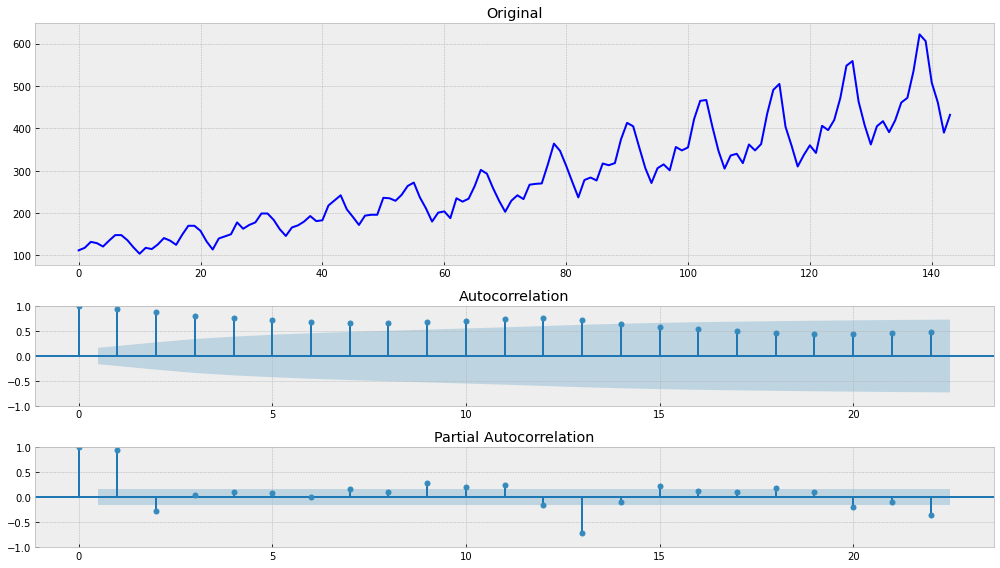

In [ ]:
tsplot(series)

<font color='green'>
Все на графиках гуляет. 
<br>
p-value                          0.991880
<br>
Стационарности нет.
<br>
Логарифмируем по Коксу, избавляясь от лишних изменений дисперсии

In [ ]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


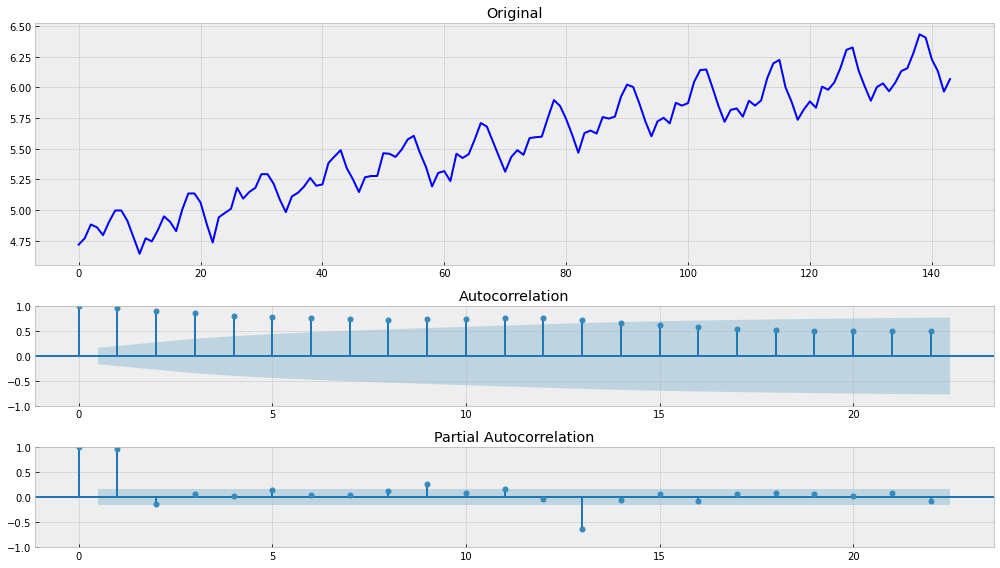

In [ ]:
tsplot(series)

<font color='green'>
Стало получше. 
<br>
p-value                          0.422367
<br>
Стационарности нет.
<br>
Продифференцируем с пораметром 1 (помесячно), избавляясь от тренда

In [ ]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


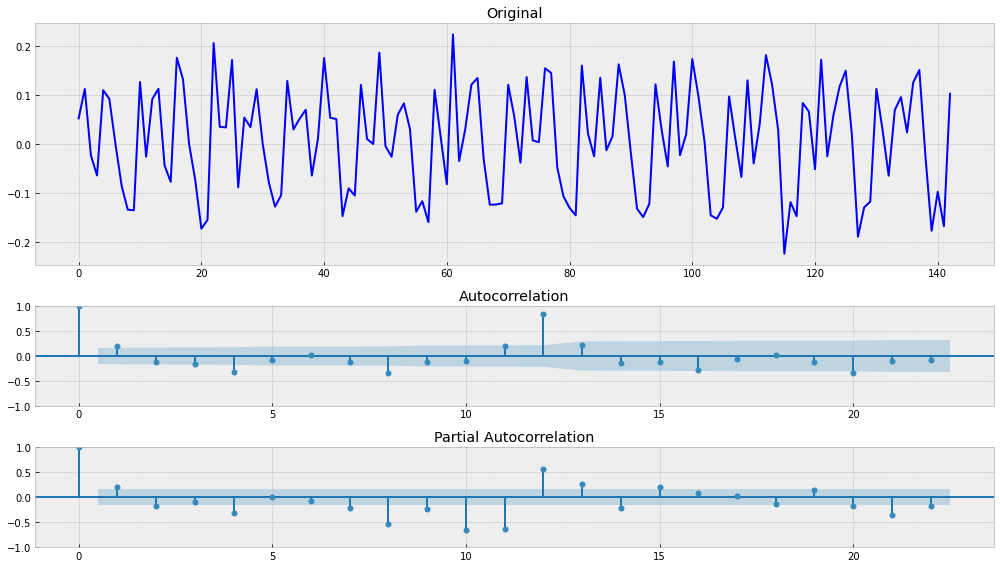

In [ ]:
tsplot(series)

<font color='green'>
На глаз видим, что стало гораздо лучше, но p-value подрос почемуто. 
<br>
p-value                          0.071121
<br>
Стационарности нет.
<br>
На автокорреляции виден пик максимума корреляции на 12 отметке.
<br>
Продифференцируем с пораметром 12 (погодично), избавляясь от годовой цикличности.

In [ ]:
series = series[12:] - series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


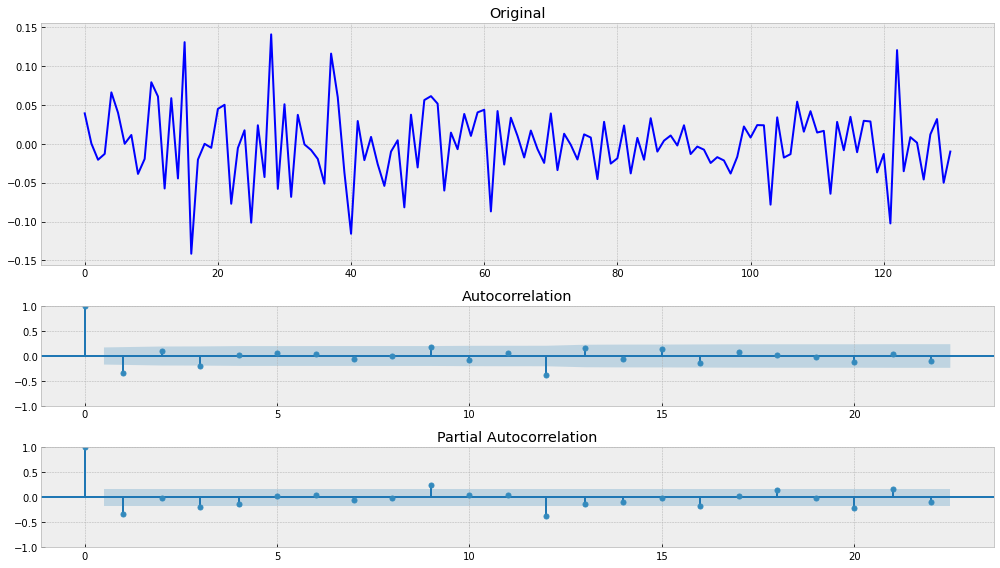

In [ ]:
tsplot(series)

<font color='green'>
Все хорошо, стационарности добились!
<br>
p-value                          0.000249
<br>
что меньше граничных 0.05
<br>
Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!
<br>

<font color='red'>
<br>
Следующий!
<br>
<br>
    "Series/monthly-sales-of-company-x-jan-6.csv"
<br>

In [ ]:
series = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


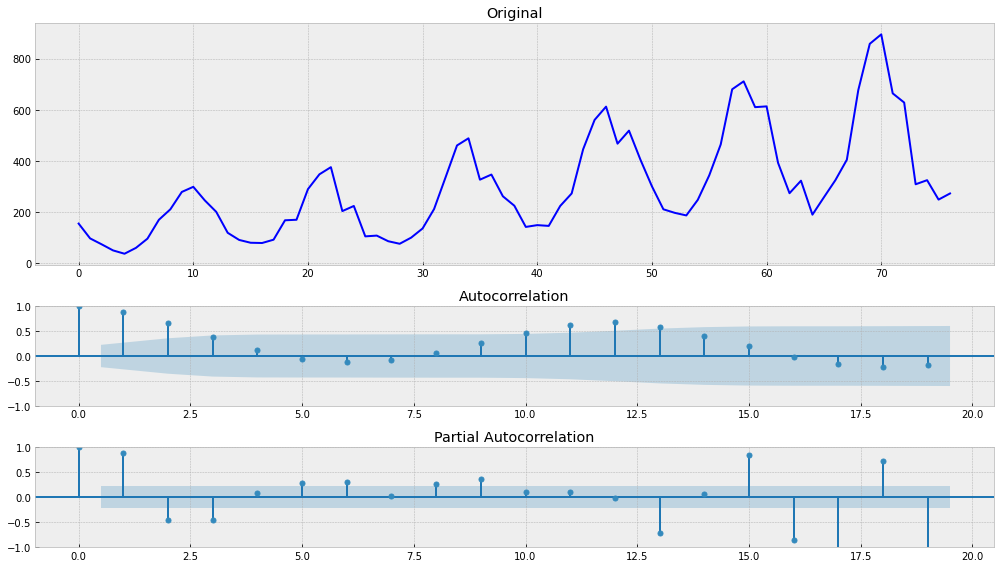

In [ ]:
tsplot(series)

<font color='green'>
Все на графиках гуляет. 
<br>
p-value                         0.988889
<br>
Стационарности нет.
<br>
Логарифмируем по Коксу, избавляясь от лишних изменений дисперсии

In [ ]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


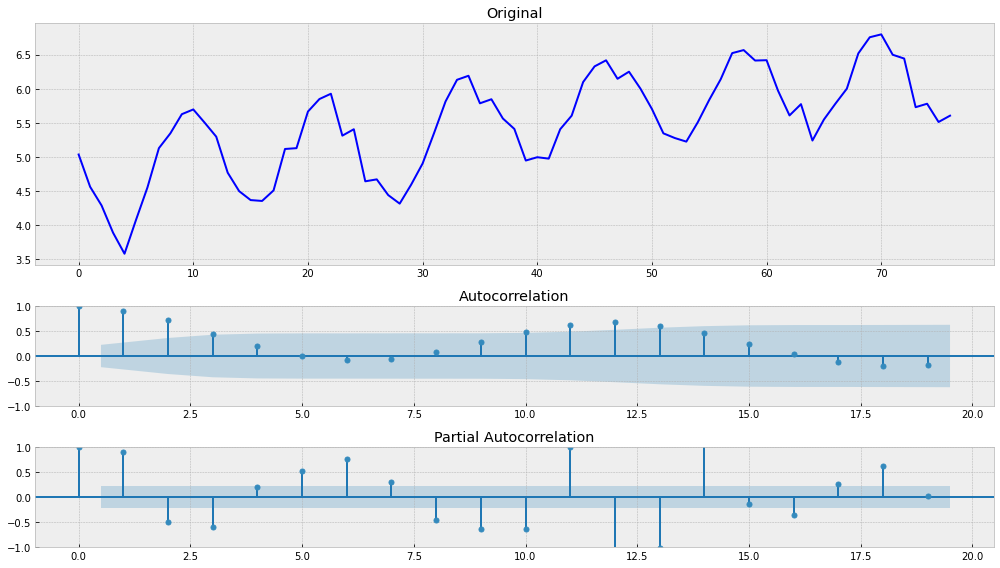

In [ ]:
tsplot(series)

<font color='green'>
Получше. 
<br>
p-value                         0.785310
<br>
Стационарности нет.
<br>
Продифференцируем с пораметром 1 (помесячно), избавляясь от тренда

In [ ]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


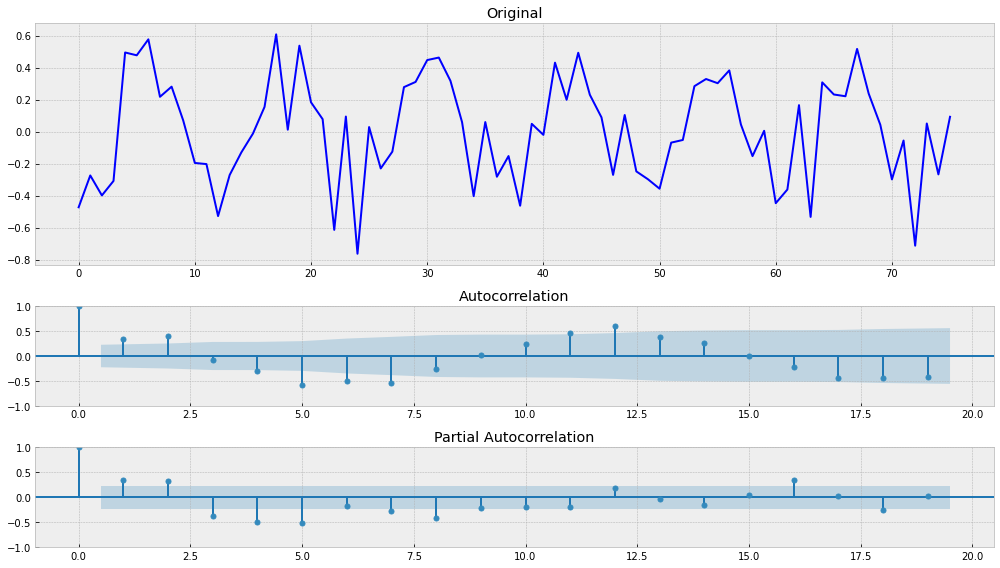

In [ ]:
tsplot(series)

<font color='green'>
Все хорошо. 
<br>
p-value                         0.024025
<br>
Стационарность получена.
<br>
Но есть предположение, что если продеффиринцировать с интервалов в 6, то можно улучшить рнзультат.

In [ ]:
series = series[6:] - series[:-6]

Results of Dickey-Fuller Test:
Test Statistic                -1.051523e+01
p-value                        1.000402e-18
#Lags Used                     6.000000e+00
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


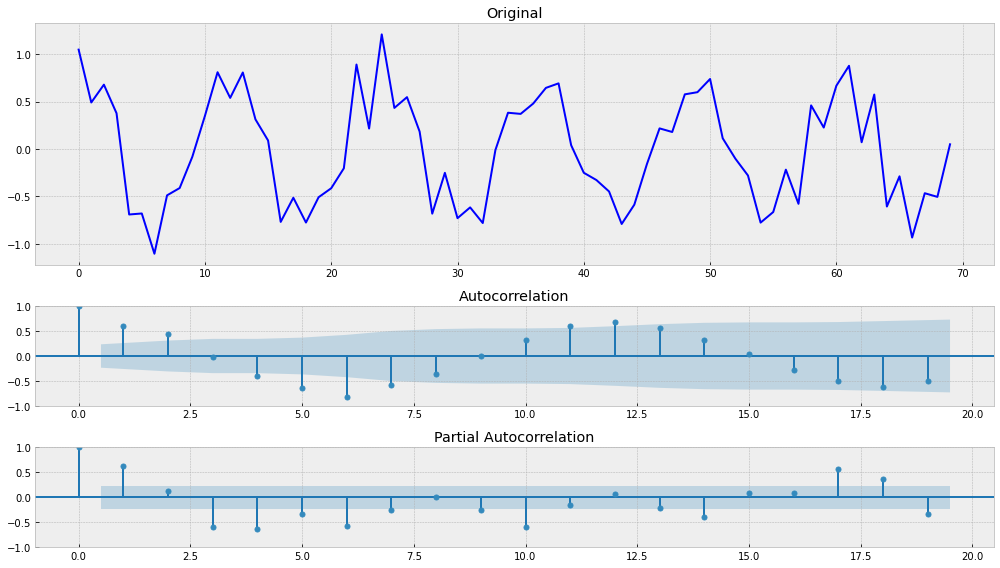

In [ ]:
tsplot(series)

<font color='green'>
Чудесно получилось. 
<br>
p-value                        1.000402e-18
<br>
Стационарность получена с вероятностью почти до нуля.
<br>
Если взять лаг 11, как нам подсказывает тест, или даже 12, стационарность будет потеряна.
    <br>
    В данном случае глаза меня не подвели.

“monthly-sales-of-company-x-jan-6.csv”,
“monthly-boston-armed-robberies-j.csv”,
“international-airline-passengers.csv”,
“mean-monthly-air-temperature-deg.csv”,
“weekly-closings-of-the-dowjones-.csv”,
"daily-total-female-births-in-cal.csv" 

<font color='red'>
<br>
Следующий!
<br>
<br>
    “monthly-boston-armed-robberies-j.csv”
<br>

In [ ]:
series = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


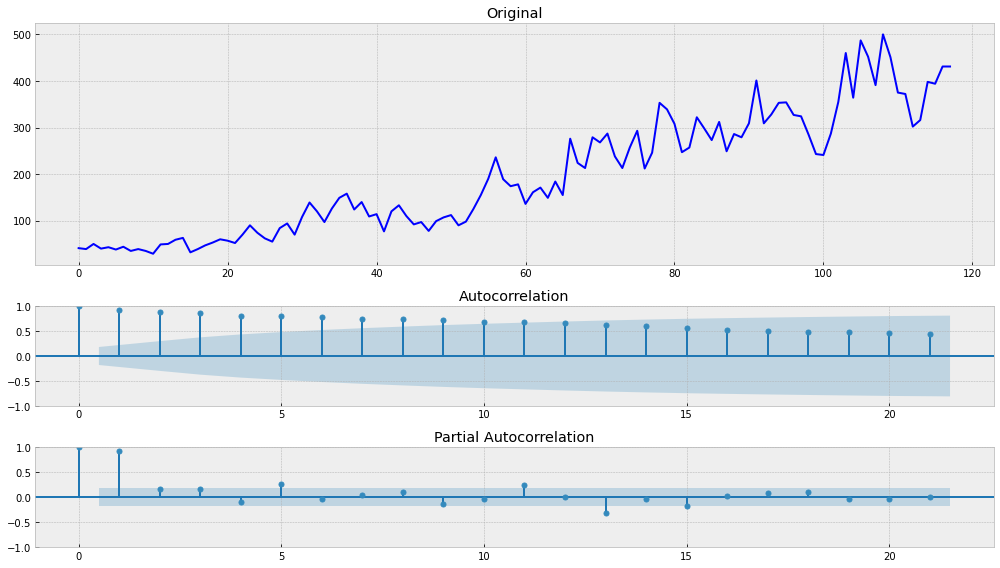

In [ ]:
tsplot(series)

<font color='green'>
Видим приятную пилу с трендом. 
<br>
p-value                          0.994278
<br>
Стационарности нет.
<br>
Логарифмируем по Коксу, избавляясь от лишних изменений дисперсии

In [ ]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


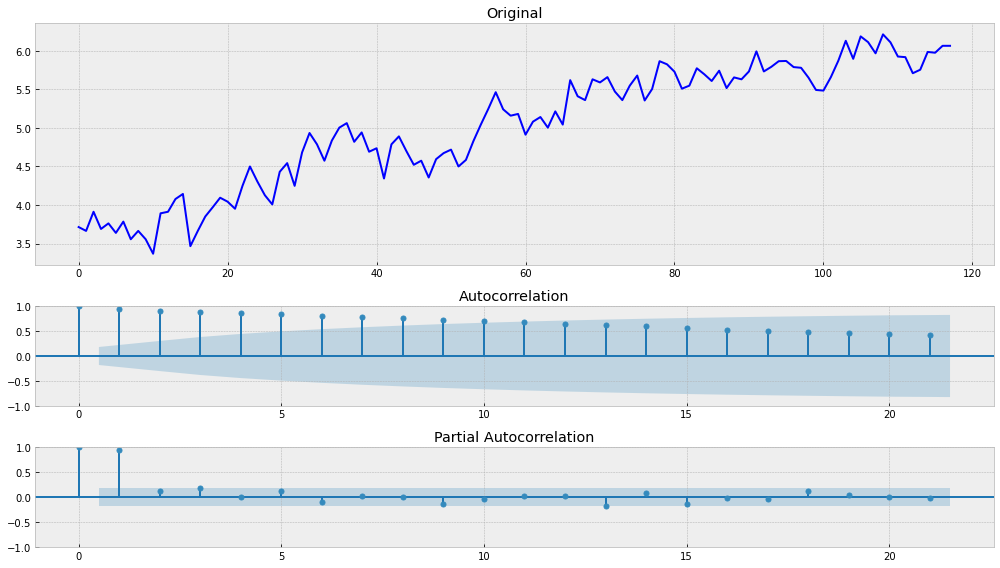

In [ ]:
tsplot(series)

<font color='green'>
Стало получше. 
<br>
p-value                          0.280833
<br>
Стационарности нет.
<br>
Продифференцируем с пораметром 1 (помесячно), избавляясь от тренда

In [ ]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


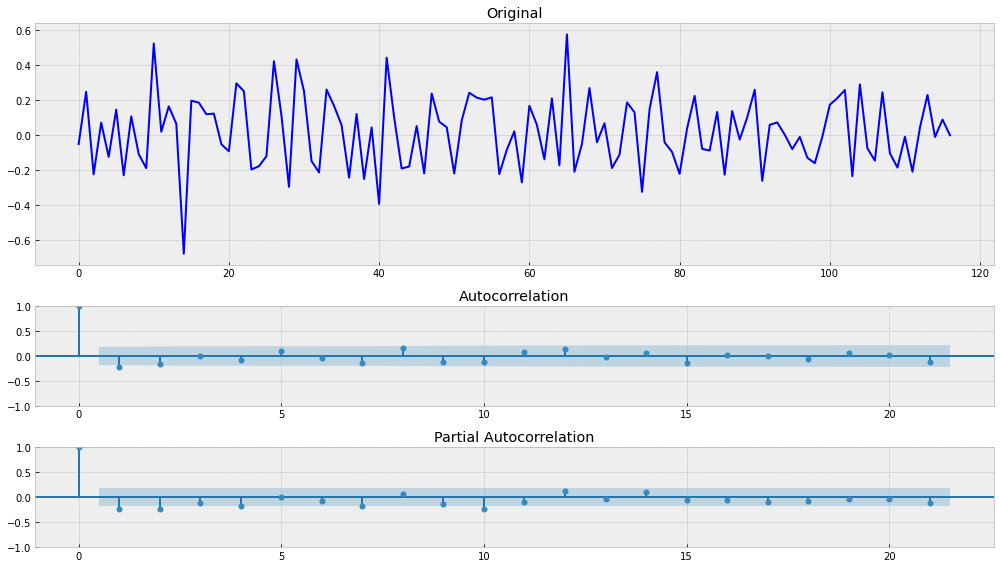

In [ ]:
tsplot(series)

<font color='green'>
Очень быстро добились стационарности. 
<br>
p-value                        2.378602e-11
<br>
Стационарность есть.
<br>
На автокорреляции как будто все ровно.
<br>
Тест подсказывает, что есть поквартальная периодичность. Проверим.

In [ ]:
series = series[3:] - series[:-3]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


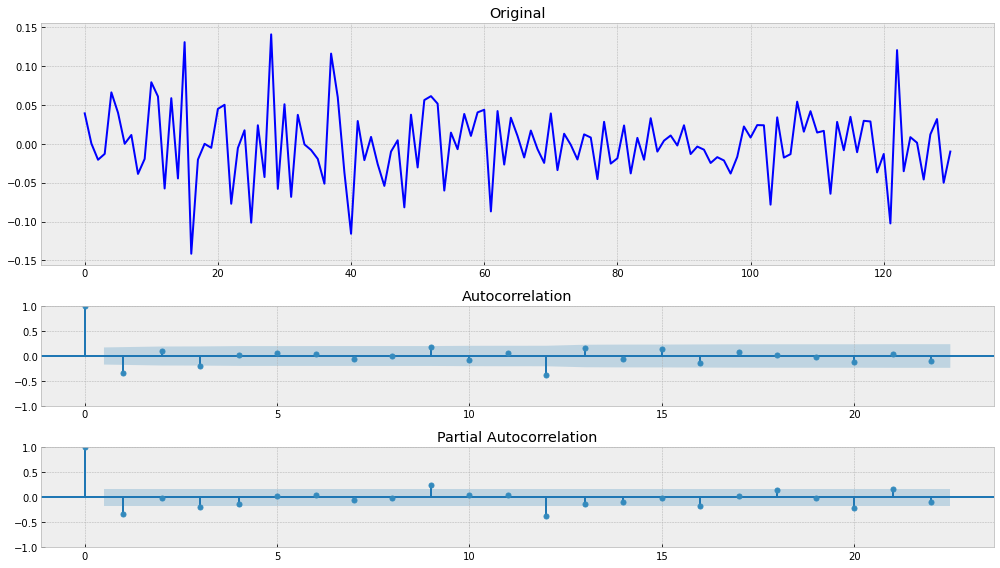

In [ ]:
tsplot(series)

<font color='green'>
Стационарность не потеряли, но параметр вероятности возрос!
<br>
p-value                          0.000249
<br>
Стационарность есть.
<br>
Теперь тест подсказывает, что есть погодичная периодичность :)!
<br>
    Видимо, как говорят, дъявол кроется в деталях.
    <br>
    Именно он раздает в Бостоне планы по ограблениям.
   

<font color='red'>
<br>
Следующий!
<br>
<br>
    “mean-monthly-air-temperature-deg.csv”
<br>

In [ ]:
series = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")['Deg']

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


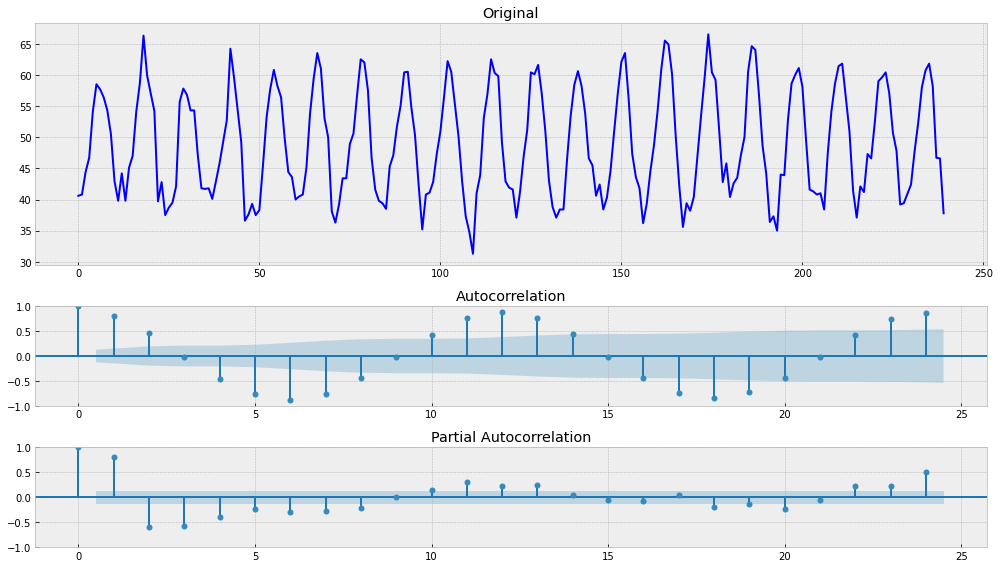

In [ ]:
tsplot(series)

<font color='green'>
Этот ряд сразу стационарен по показателю p-value. 
<br>
p-value                          0.016989
<br>
Но автокорреляция резко не падает и не затухает. Нельзя считать его стационарным.
<br>
Стационарности нет.
<br>
Попробуем убрать сезонность в 12 месяцев, и посмотреть,что получится.

In [ ]:
series = series[11:] - series[:-11]

Results of Dickey-Fuller Test:
Test Statistic                -8.457561e+00
p-value                        1.599515e-13
#Lags Used                     1.700000e+01
Number of Observations Used    3.300000e+02
Critical Value (1%)           -3.450322e+00
Critical Value (5%)           -2.870338e+00
Critical Value (10%)          -2.571458e+00
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


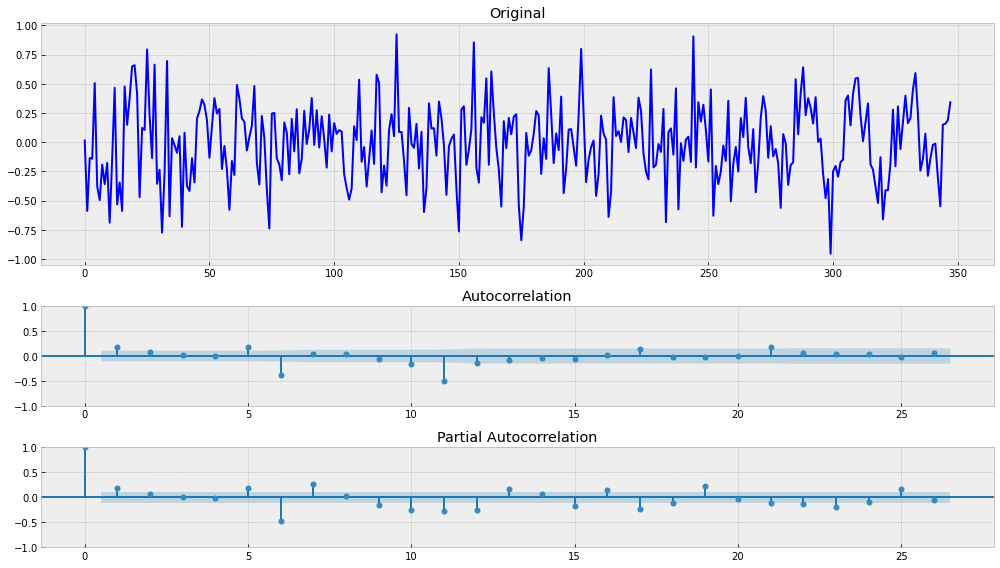

In [ ]:
tsplot(series)

<font color='green'>
При попытке отобразить результат диффиренцирования по 12 возникает какая то ошибка. Заменил 12 на 11 (так сказать в первом приближении.
<br>
Получили стационарность по автокорреляции и очень маленькоp-value
<br>
p-value                        1.599515e-13
<br>
Стационарности есть. 
<br>
<br>

<font color='red'>
<br>
Следующий!
<br>
<br>
    “weekly-closings-of-the-dowjones-.csv”
<br>

In [ ]:
series = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")['Close']

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


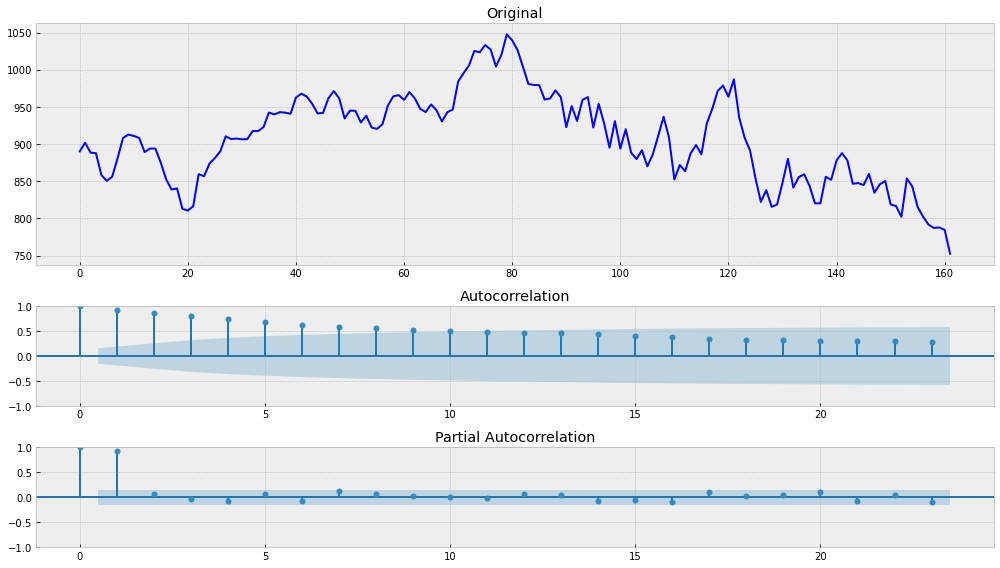

In [ ]:
tsplot(series)

<font color='green'>
График гуляет, но не очень сильно. 
<br>
p-value                          0.622455
<br>
Стационарности нет.
<br>
Логарифмируем по Коксу, избавляясь от лишних изменений дисперсии

In [ ]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


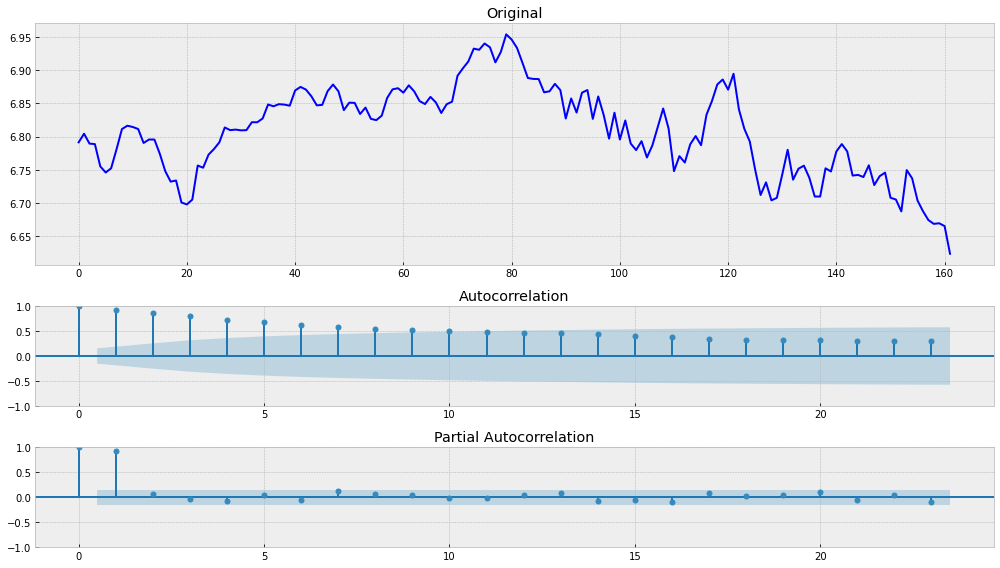

In [ ]:
tsplot(series)

<font color='green'>
Стало получше, но p-value подросло. 
<br>
p-value                          0.669119
<br>
Стационарности нет.
<br>
Продифференцируем с пораметром 1 (помесячно), избавляясь от тренда

In [ ]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


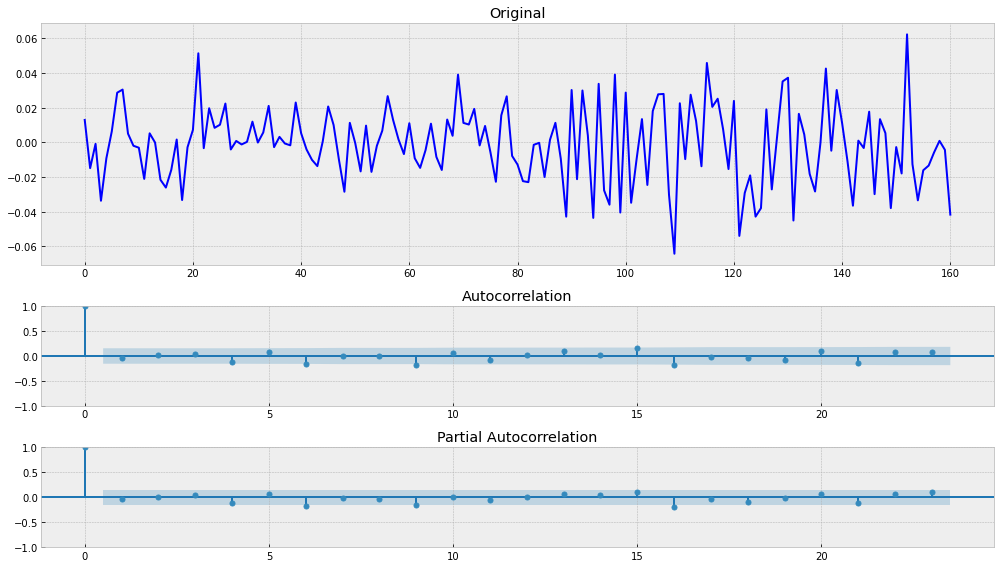

In [ ]:
tsplot(series)

<font color='green'>
Стационарность достигнута. Для p-value получили очень глубокий минус. 
<br>
p-value                        2.751609e-24
<br>
Стационарности есть.
<br>
Тест не видит в этих данных никакого лага.
<br>
На глаз тоже ничего такого незаметно. Ничего больше делать ненадо.

<font color='red'>
<br>
Следующий!
<br>
<br>
    "daily-total-female-births-in-cal.csv" 
<br>

In [ ]:
series = pd.read_csv("Series/daily-total-female-births-in-cal.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


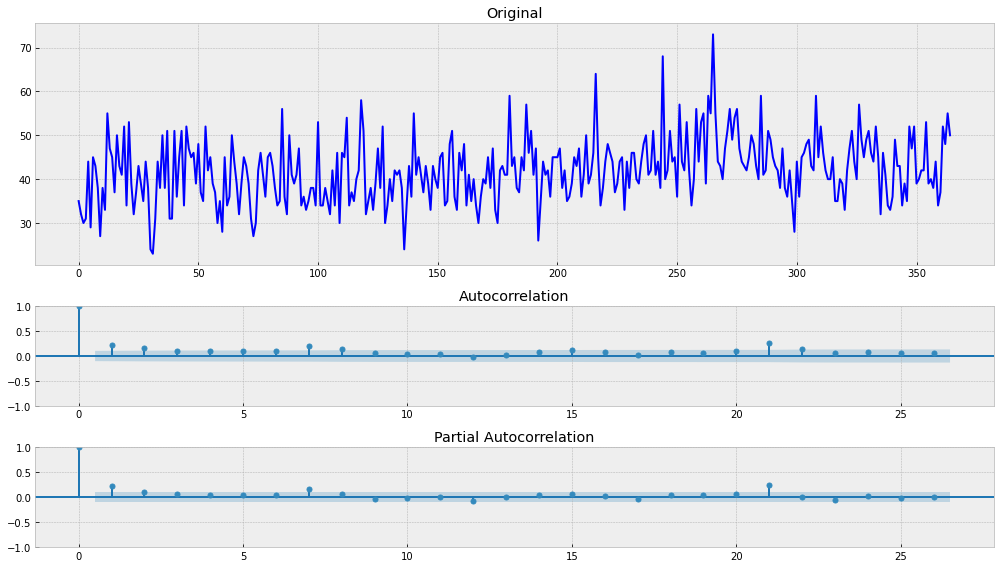

In [ ]:
tsplot(series)

<font color='green'>
Стационарность сразу есть. 
<br>
p-value                          0.000052
<br>
Стационарности есть.
<br>
На этом можно было бы остановиться, но тест видит лаг кратный 6. Попробуем его применить. 
<br>
Но сначала снизим дисперсию.
<br>
Логарифмируем по Коксу, избавляясь от лишних изменений дисперсии

In [ ]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -4.353173
p-value                          0.000359
#Lags Used                       7.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


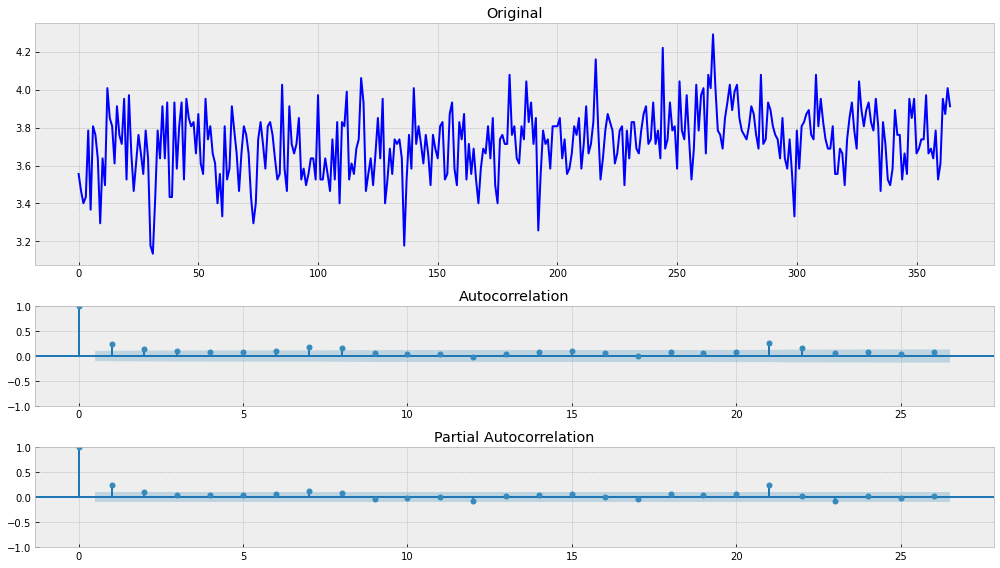

In [ ]:
tsplot(series)

<font color='green'>
Стало получше, но p-value возросло. 
<br>
p-value                          0.000359
<br>
Стационарности есть.
<br>
Продифференцируем с пораметром 6 для эксперимента.

In [ ]:
series = series[6:] - series[:-6]

Results of Dickey-Fuller Test:
Test Statistic                -8.525258e+00
p-value                        1.073488e-13
#Lags Used                     1.700000e+01
Number of Observations Used    3.410000e+02
Critical Value (1%)           -3.449673e+00
Critical Value (5%)           -2.870053e+00
Critical Value (10%)          -2.571306e+00
dtype: float64


/home/avm/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


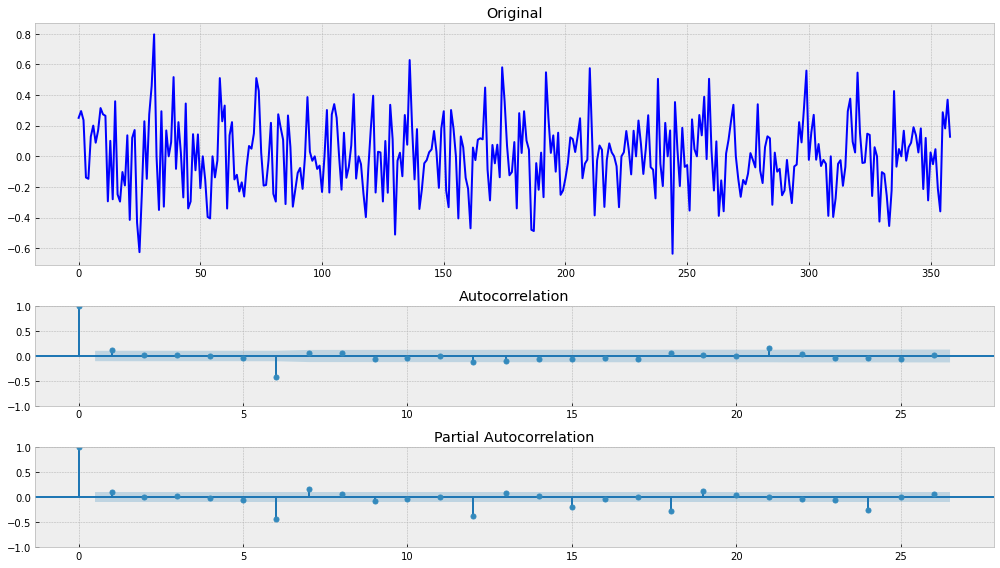

In [ ]:
tsplot(series)

<font color='green'>
Получили глубокий 0 для p-value. 
<br>
p-value                        1.073488e-13
<br>
Стационарности есть.

<font color='red'>
<br>
Это был последний временной ряд!
<br>